In [16]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importiere die notwendigen Bibliotheken
from tabulate import tabulate

In [17]:
# Directory you want to retrieve files from
target_directory = '/Users/mxhbmn/Desktop/12. Semester/IM_Challenge/Data/Results_Main_MIP'
os.chdir(target_directory)

data_list = []
data = pd.DataFrame(columns = ["cohort", "day", "num_tasks", "profit", "gap", "time", "constraint", "variable"])
for cohort in [7]: 
    for day in [2,5,8,10]: #[2,5,8,10]: 
        for instance in [1,2]:
            for num_tasks in [50,200,500,1000]: 
            
                endstring = str(cohort) + "_" + str(day) + "_1_" + str(num_tasks) + ".txt"

                with open(file = target_directory+"/solution"+endstring) as file: 
                    first_line = [float(item) for item in file.readline().strip().split("\t")]


                    profit = first_line[0]
                    gap = first_line[1]
                    
                    if gap == np.inf: 
                        gap = 1
                    time = first_line[2]
                    constraint = first_line[3]
                    variable = first_line[4]

                    data_list.append([cohort,day,instance,num_tasks,profit,gap,time,constraint,variable])
                    #print(cohort,day,num_tasks,profit,gap,time,constraint,variable)

data = pd.DataFrame(data_list,columns = ["Cohorts", "Day", "Instance","Num_Tasks", "Profit", "Gap", "Time", "Constraint", "Variable"])

# Condition: If 'Gap' is greater than 1, change the 'Gap' column to 1
data.loc[data['Gap'] > 1, 'Gap'] = 1

# Group by instance and take the mean! 
# Group by the 'Instance' column and calculate the mean for each group
data = data.groupby(['Cohorts','Day', 'Num_Tasks']).mean()
data.reset_index(inplace=True)

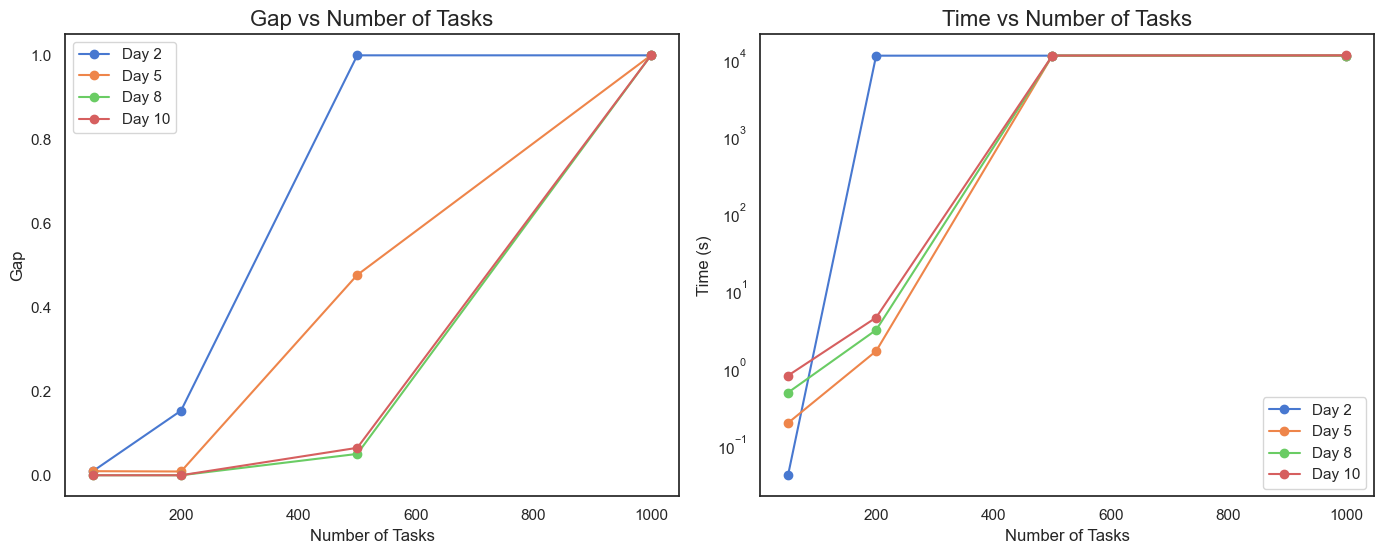

In [18]:


# Assuming 'data' is your DataFrame with 'Day', 'Num_Tasks', 'Gap', and 'Time' columns
# and 'df' is used for other purposes.

# Set global plot style to serif font and seaborn whitegrid
plt.rcParams["font.family"] = "serif"
sns.set(style="white")

# Unique days for plotting
# Unique days for plotting
days = data['Day'].unique()

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Consistent color palette for both subplots
palette = sns.color_palette("muted", len(days))

# Subplot 1: Gap vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[0].plot(subset['Num_Tasks'], subset['Gap'], marker='o', label=f'Day {day}', color=palette[idx])
axes[0].set_title('Gap vs Number of Tasks', fontsize=16)
axes[0].set_xlabel('Number of Tasks', fontsize=12)
axes[0].set_ylabel('Gap', fontsize=12)
axes[0].legend()

# Subplot 2: Time vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[1].plot(subset['Num_Tasks'], subset['Time'], marker='o', label=f'Day {day}', color=palette[idx])
axes[1].set_yscale('log')
axes[1].set_title('Time vs Number of Tasks', fontsize=16)
axes[1].set_xlabel('Number of Tasks', fontsize=12)
axes[1].set_ylabel('Time (s)', fontsize=12)
axes[1].legend()

# Adjust layout for tightness
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('results_main.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


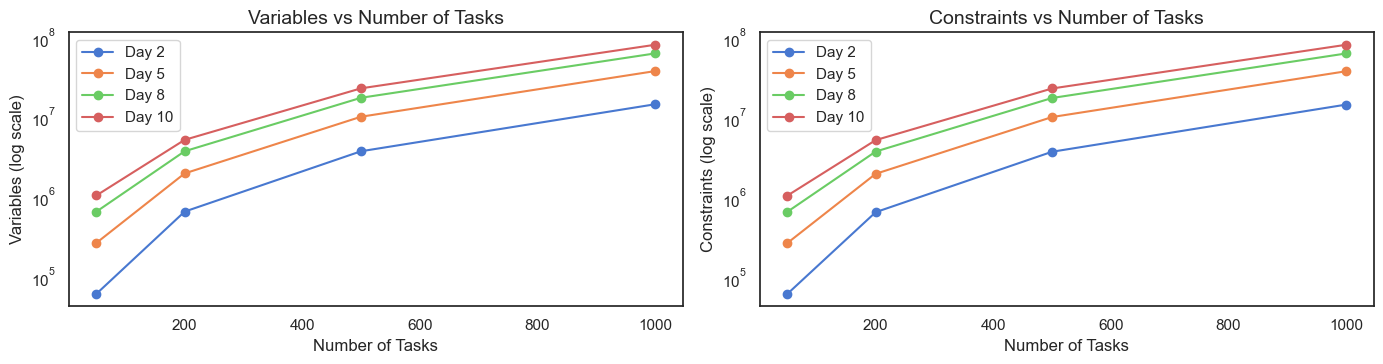

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style to "whitegrid" and font to serif for consistency
plt.rcParams["font.family"] = "serif"
sns.set(style="white")

# Unique days for plotting
days = data['Day'].unique()

# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Consistent color palette for both subplots
palette = sns.color_palette("muted", len(days))

# Subplot 1: Variables vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[0].plot(subset['Num_Tasks'], subset['Variable'], marker='o', label=f'Day {day}', color=palette[idx])
axes[0].set_yscale('log')
axes[0].set_title('Variables vs Number of Tasks', fontsize=14)
axes[0].set_xlabel('Number of Tasks', fontsize=12)
axes[0].set_ylabel('Variables (log scale)', fontsize=12)
axes[0].legend()

# Subplot 2: Constraints vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[1].plot(subset['Num_Tasks'], subset['Constraint'], marker='o', label=f'Day {day}', color=palette[idx])
axes[1].set_yscale('log')
axes[1].set_title('Constraints vs Number of Tasks', fontsize=14)
axes[1].set_xlabel('Number of Tasks', fontsize=12)
axes[1].set_ylabel('Constraints (log scale)', fontsize=12)
axes[1].legend()

# Adjust the layout for better spacing and aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('results_mip_constraints_variables.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [20]:
data

,Cohorts,Day,Num_Tasks,Instance,Profit,Gap,Time,Constraint,Variable
0,7,2,50,1.5,103.0,0.009709,0.04,63685.0,60970.0
1,7,2,200,1.5,390.0,0.153846,10801.29,662335.0,653170.0
2,7,2,500,1.5,372.0,1.000000,10801.90,3749635.0,3727570.0
3,7,2,1000,1.5,0.0,1.000000,10811.10,14495135.0,14451570.0
4,7,5,50,1.5,103.0,0.009709,0.19,273799.0,264880.0
5,7,5,200,1.5,446.0,0.008969,1.62,1990699.0,1965880.0
6,7,5,500,1.5,784.0,0.477041,10804.87,10149499.0,10092880.0
7,7,5,1000,1.5,0.0,1.000000,10850.46,37747499.0,37637880.0
8,7,8,50,1.5,104.0,0.000000,0.47,670897.0,653128.0
9,7,8,200,1.5,450.0,0.000000,3.04,3770647.0,3727528.0
